# Estadistica Aplicada

Sesión7, 23agosto

Ricardo de Jesús Cervantes García G41

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import statsmodels.formula.api as smf

In [28]:
datos=pd.read_excel('modelolineal.xlsx')
datos

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21
5,6,24.436799,22
6,7,14.507928,19
7,8,16.013496,14
8,9,12.043514,3
9,10,6.808838,1


In [29]:
datos=datos[['Y','X']]

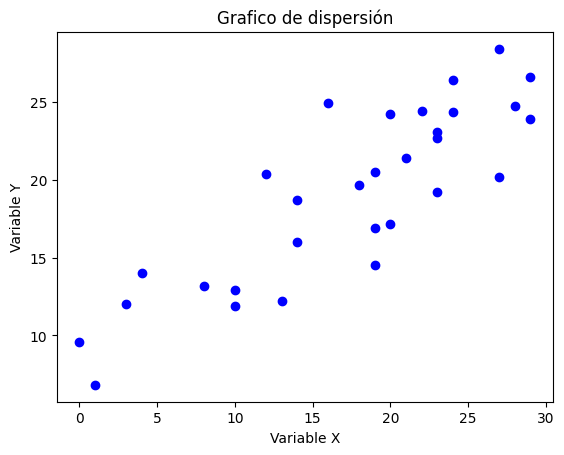

In [30]:
plt.scatter(datos['X'],datos['Y'],color='blue')
plt.title('Grafico de dispersión')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

In [31]:
reg=smf.ols(formula='Y~X',data=datos)
results=reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        14:29:03   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

In [ ]:
Para evaluar un modelo generalmente se usa R^2. Pero no es la unica, también se suele usar el MAD,MAPE y el MSD

MAD= Desviación absoluta media.

MSD= Desviación cuadratica media.

MAPE= Error porcentual absoluto medio.

In [39]:
datos['X2']=datos['X']**2
train_set=datos[:20]
test_set=datos[20:]

In [40]:
reg_m1=smf.ols(formula='Y~X',data=train_set)
results_m1=reg_m1.fit()

In [42]:
b0=results_m1.params[0]
b1=results_m1.params[1]

In [43]:
test_set['Y_hat']=b0+b1*test_set['X']

C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\642065681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat']=b0+b1*test_set['X']


In [58]:
test_set

,Y,X,X2,Y_hat,Y_hat2
20,9.544102,0,0,9.233587,8.207381
21,24.230330,20,400,20.117395,20.353727
22,26.417826,24,576,22.294157,22.246155
23,23.066723,23,529,21.749966,21.789824
24,13.145005,8,64,13.587110,13.602761
25,24.385156,24,576,22.294157,22.246155
26,12.934102,10,100,14.675491,14.839764
27,14.002469,4,16,11.410349,10.994544
28,26.599047,29,841,25.015109,24.360045
29,11.910387,10,100,14.675491,14.839764


In [45]:
MAD=(test_set['Y']-test_set['Y_hat']).abs().mean()

In [46]:
reg2=smf.ols(formula='Y~X+X2',data=train_set)
results_m2=reg2.fit()

In [50]:
b0=results_m2.params[0]
b1=results_m2.params[1]
b2=results_m2.params[2]

In [56]:
test_set['Y_hat2']=b0+b1*test_set['X']+b2*test_set['X2']

C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\4009367527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat2']=b0+b1*test_set['X']+b2*test_set['X2']


In [57]:
MAD=(test_set['Y']-test_set['Y_hat2']).abs().mean()

El mejor modelo según MAD es el de menor MAD